In [3]:
'''

Utilising from_tensor_slices

'''

import numpy as np
import tensorflow as tf
from tensorflow.keras import layers

model = tf.keras.Sequential([
    layers.Dense(64, activation='relu', input_shape=(32,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(optimizer='adam',
              loss='mse',
              metrics=['mae'])

# generate some big input datasets, bigger than 2GB
data = np.random.random((1024*1024*8, 32))
labels = np.random.random((1024*1024*8, 1))
val_data = np.random.random((100, 32))
val_labels = np.random.random((100, 1))

train_dataset = tf.data.Dataset.from_tensor_slices((data, labels))
train_dataset = train_dataset.batch(32).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((val_data, val_labels))
val_dataset = val_dataset.batch(32).repeat()

history = model.fit(train_dataset, 
          epochs=100, 
          steps_per_epoch=5,
          validation_data=val_dataset, 
          validation_steps=3,
          verbose=0)

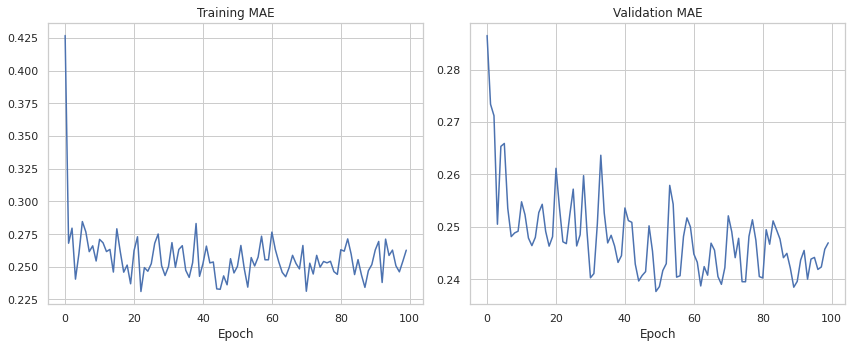

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set(style='whitegrid')

fig,ax = plt.subplots(1,2,figsize=(12,5))
sns.lineplot(x=history.epoch,y=history.history['mae'],ax=ax[0])
sns.lineplot(x=history.epoch,y=history.history['val_mae'],ax=ax[1])
ax[0].title.set_text('Training MAE')
ax[1].title.set_text('Validation MAE')
ax[0].set_xlabel('Epoch')
ax[1].set_xlabel('Epoch')
plt.tight_layout()